#         Assignment 2a: Supervised Learning (ANN)

Dataset2: Fedex

In [77]:
#import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import keras
import tensorflow
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

#### Loading the data

In [78]:
#load the data from csv file
data = pd.read_csv("fedex.csv")
data.shape

(3604175, 15)

In [79]:
#get the datatype of each field
print("\n Columns & DataTypes: \n")
print(data.info())

# Check for missing values
print("\n Columns with Missing values: \n")
missing_values = data.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

# Descriptive statistics
print("\n Descriptive Statistics: \n")
print(data.describe().T)


 Columns & DataTypes: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604175 entries, 0 to 3604174
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Month                  int64  
 2   DayofMonth             int64  
 3   DayOfWeek              int64  
 4   Actual_Shipment_Time   float64
 5   Planned_Shipment_Time  int64  
 6   Planned_Delivery_Time  int64  
 7   Carrier_Name           object 
 8   Carrier_Num            int64  
 9   Planned_TimeofTravel   float64
 10  Shipment_Delay         float64
 11  Source                 object 
 12  Destination            object 
 13  Distance               int64  
 14  Delivery_Status        float64
dtypes: float64(4), int64(8), object(3)
memory usage: 412.5+ MB
None

 Columns with Missing values: 

Actual_Shipment_Time    81602
Shipment_Delay          81602
Delivery_Status         81602
Planned_TimeofTravel      547
dtype: int64

 Descriptive S

In [80]:
#display 5 rows
print("Display 5 Data rows: \n")
data.head(5)

Display 5 Data rows: 



,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0


In [81]:
#check and remove duplicates
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [82]:
#replace columns with NA to nan and drop nan records
data['Delivery_Status'] = data['Delivery_Status'].replace('NA', np.nan)
#data['Actual_Shipment_Time'] = data['Actual_Shipment_Time'].replace('NA', np.nan)
#data['Planned_TimeofTravel'] = data['Planned_TimeofTravel'].replace('NA', np.nan)
data.dropna(inplace = True)
#data.isnull().any()

In [83]:
# as some rows are removed, reset the index
data.reset_index(inplace=True)
data.head(5)

,index,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0


In [84]:
#remove columns that are not necessary for analysis
data.drop(['Year','index'],axis=1,inplace=True)
data.head(5)

,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0


In [85]:
#get the updated description
data.describe()

,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Distance,Delivery_Status
count,3.522163e+06,3.522163e+06,3.522163e+06,3.522163e+06,3.522163e+06,3.522163e+06,3.522163e+06,3.522163e+06,3.522163e+06,3.522163e+06,3.522163e+06
mean,3.526789e+00,1.570808e+01,3.939062e+00,1.338461e+03,1.328270e+03,1.494155e+03,2.207063e+03,1.295058e+02,1.115819e+01,7.316150e+02,2.038781e-01
std,1.709348e+00,8.759677e+00,1.988318e+00,4.814030e+02,4.666260e+02,4.856454e+02,1.936827e+03,6.974351e+01,3.618869e+01,5.630380e+02,4.028795e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-2.500000e+01,-9.200000e+01,1.100000e+01,0.000000e+00
25%,2.000000e+00,8.000000e+00,2.000000e+00,9.290000e+02,9.250000e+02,1.114000e+03,6.110000e+02,8.000000e+01,-4.000000e+00,3.280000e+02,0.000000e+00
50%,4.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,1.320000e+03,1.517000e+03,1.562000e+03,1.110000e+02,-1.000000e+00,5.850000e+02,0.000000e+00
75%,5.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.910000e+03,3.573000e+03,1.600000e+02,1.000000e+01,9.630000e+02,0.000000e+00
max,6.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.359000e+03,9.740000e+03,6.600000e+02,2.467000e+03,4.962000e+03,1.000000e+00


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522163 entries, 0 to 3522162
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Month                  int64  
 1   DayofMonth             int64  
 2   DayOfWeek              int64  
 3   Actual_Shipment_Time   float64
 4   Planned_Shipment_Time  int64  
 5   Planned_Delivery_Time  int64  
 6   Carrier_Name           object 
 7   Carrier_Num            int64  
 8   Planned_TimeofTravel   float64
 9   Shipment_Delay         float64
 10  Source                 object 
 11  Destination            object 
 12  Distance               int64  
 13  Delivery_Status        float64
dtypes: float64(4), int64(7), object(3)
memory usage: 376.2+ MB


# Identify Categorical Variables

In [87]:
#convert delivery status to int
#data.Delivery_Status = data['Delivery_Status'].astype(int)

In [88]:
# Fill missing values for numerical features with mean
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Fill missing values for categorical columns with the mode
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)


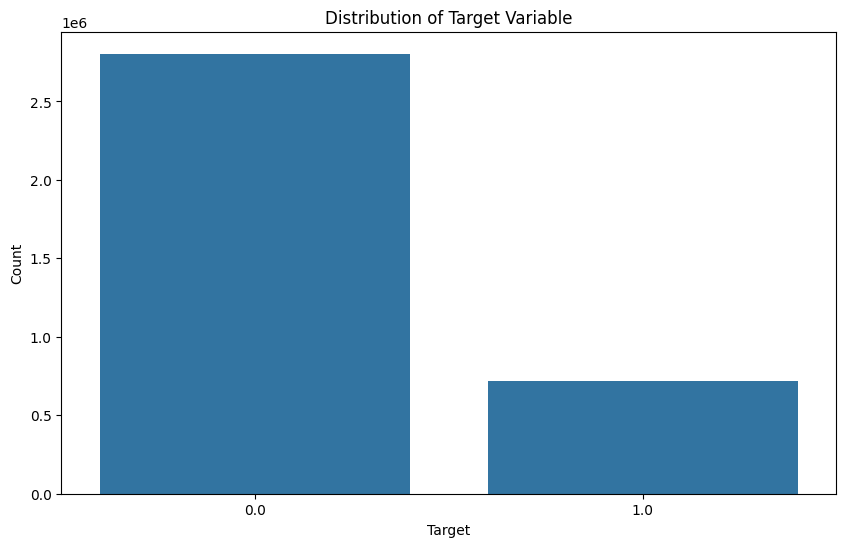

In [89]:
# plot delivery status against count
plt.figure(figsize=(10, 6))
sns.countplot(x='Delivery_Status', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

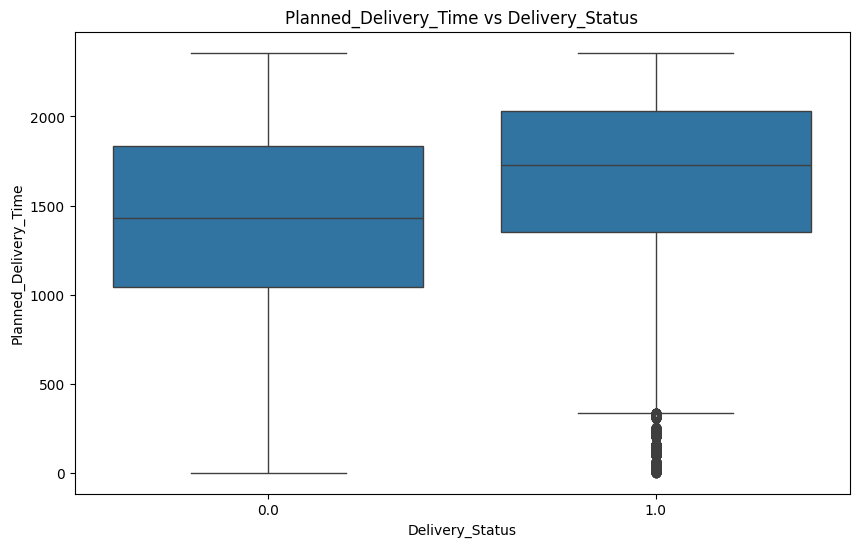

In [90]:
#plot planned Delivery Time Vs Delivery Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Delivery_Status', y='Planned_Delivery_Time', data=data)  
plt.title('Planned_Delivery_Time vs Delivery_Status')
plt.xlabel('Delivery_Status')
plt.ylabel('Planned_Delivery_Time')
plt.show()

In [91]:
data.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'Actual_Shipment_Time',
       'Planned_Shipment_Time', 'Planned_Delivery_Time', 'Carrier_Name',
       'Carrier_Num', 'Planned_TimeofTravel', 'Shipment_Delay', 'Source',
       'Destination', 'Distance', 'Delivery_Status'],
      dtype='object')

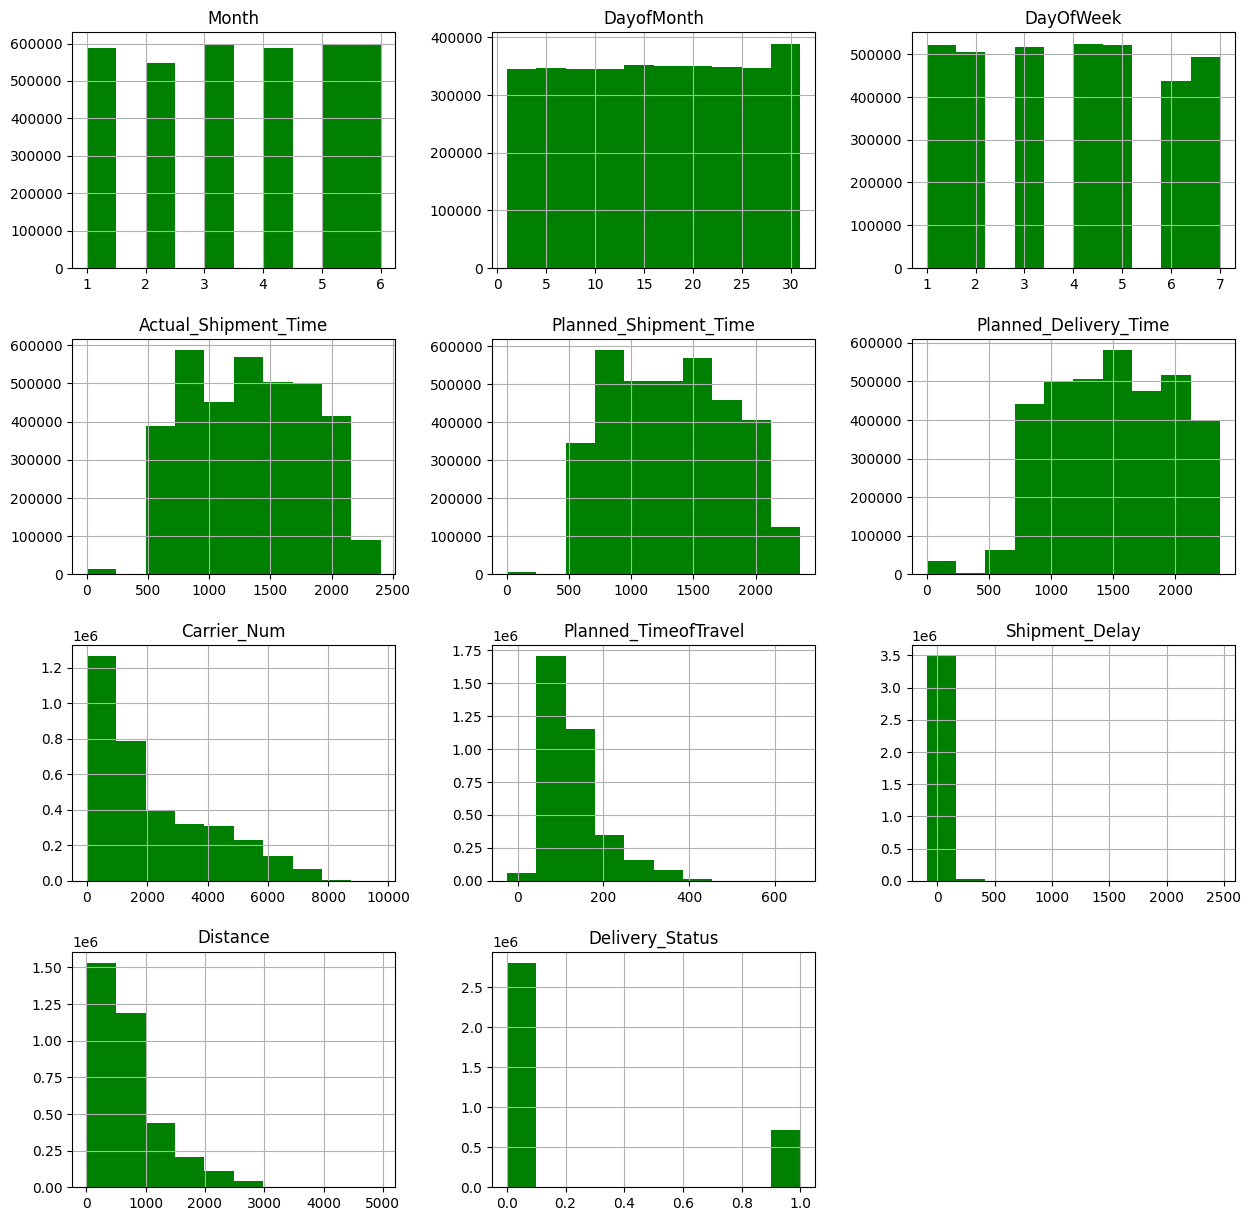

In [92]:
#plot histogram 
data.hist(figsize = (15,15), color = 'green')
plt.show()

In [93]:
# Convert categorical variables to numerical using OneHotEncoder
label_encoder = LabelEncoder()

data['Carrier_Name'] = label_encoder.fit_transform(data['Carrier_Name'])
data['Source'] = label_encoder.fit_transform(data['Source'])
data['Destination'] = label_encoder.fit_transform(data['Destination'])

In [94]:
#find columns that are highly correlated and remove before classification
corr_mat_abs = data.corr().abs()
upper = corr_mat_abs.where(np.triu(np.ones(corr_mat_abs.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print("columns dropped:",to_drop)
data = data.drop(to_drop,axis = 1)
data

columns dropped: ['Planned_Shipment_Time', 'Distance']


,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Delivery_Status
0,1,3,4,2003.0,2225,17,335,150.0,8.0,134,281,0.0
1,1,3,4,754.0,1000,17,3231,145.0,19.0,134,281,1.0
2,1,3,4,628.0,750,17,448,90.0,8.0,139,48,0.0
3,1,3,4,926.0,1100,17,1746,90.0,-4.0,139,48,0.0
4,1,3,4,1829.0,1925,17,3920,90.0,34.0,139,48,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3522158,6,19,4,1059.0,1256,6,1547,236.0,-1.0,18,146,0.0
3522159,6,19,4,555.0,738,6,1548,98.0,-5.0,242,18,0.0
3522160,6,19,4,821.0,1003,6,1548,96.0,-6.0,18,140,0.0
3522161,6,19,4,718.0,852,6,1551,77.0,-17.0,50,18,0.0


Plotting Correlation Heatmap

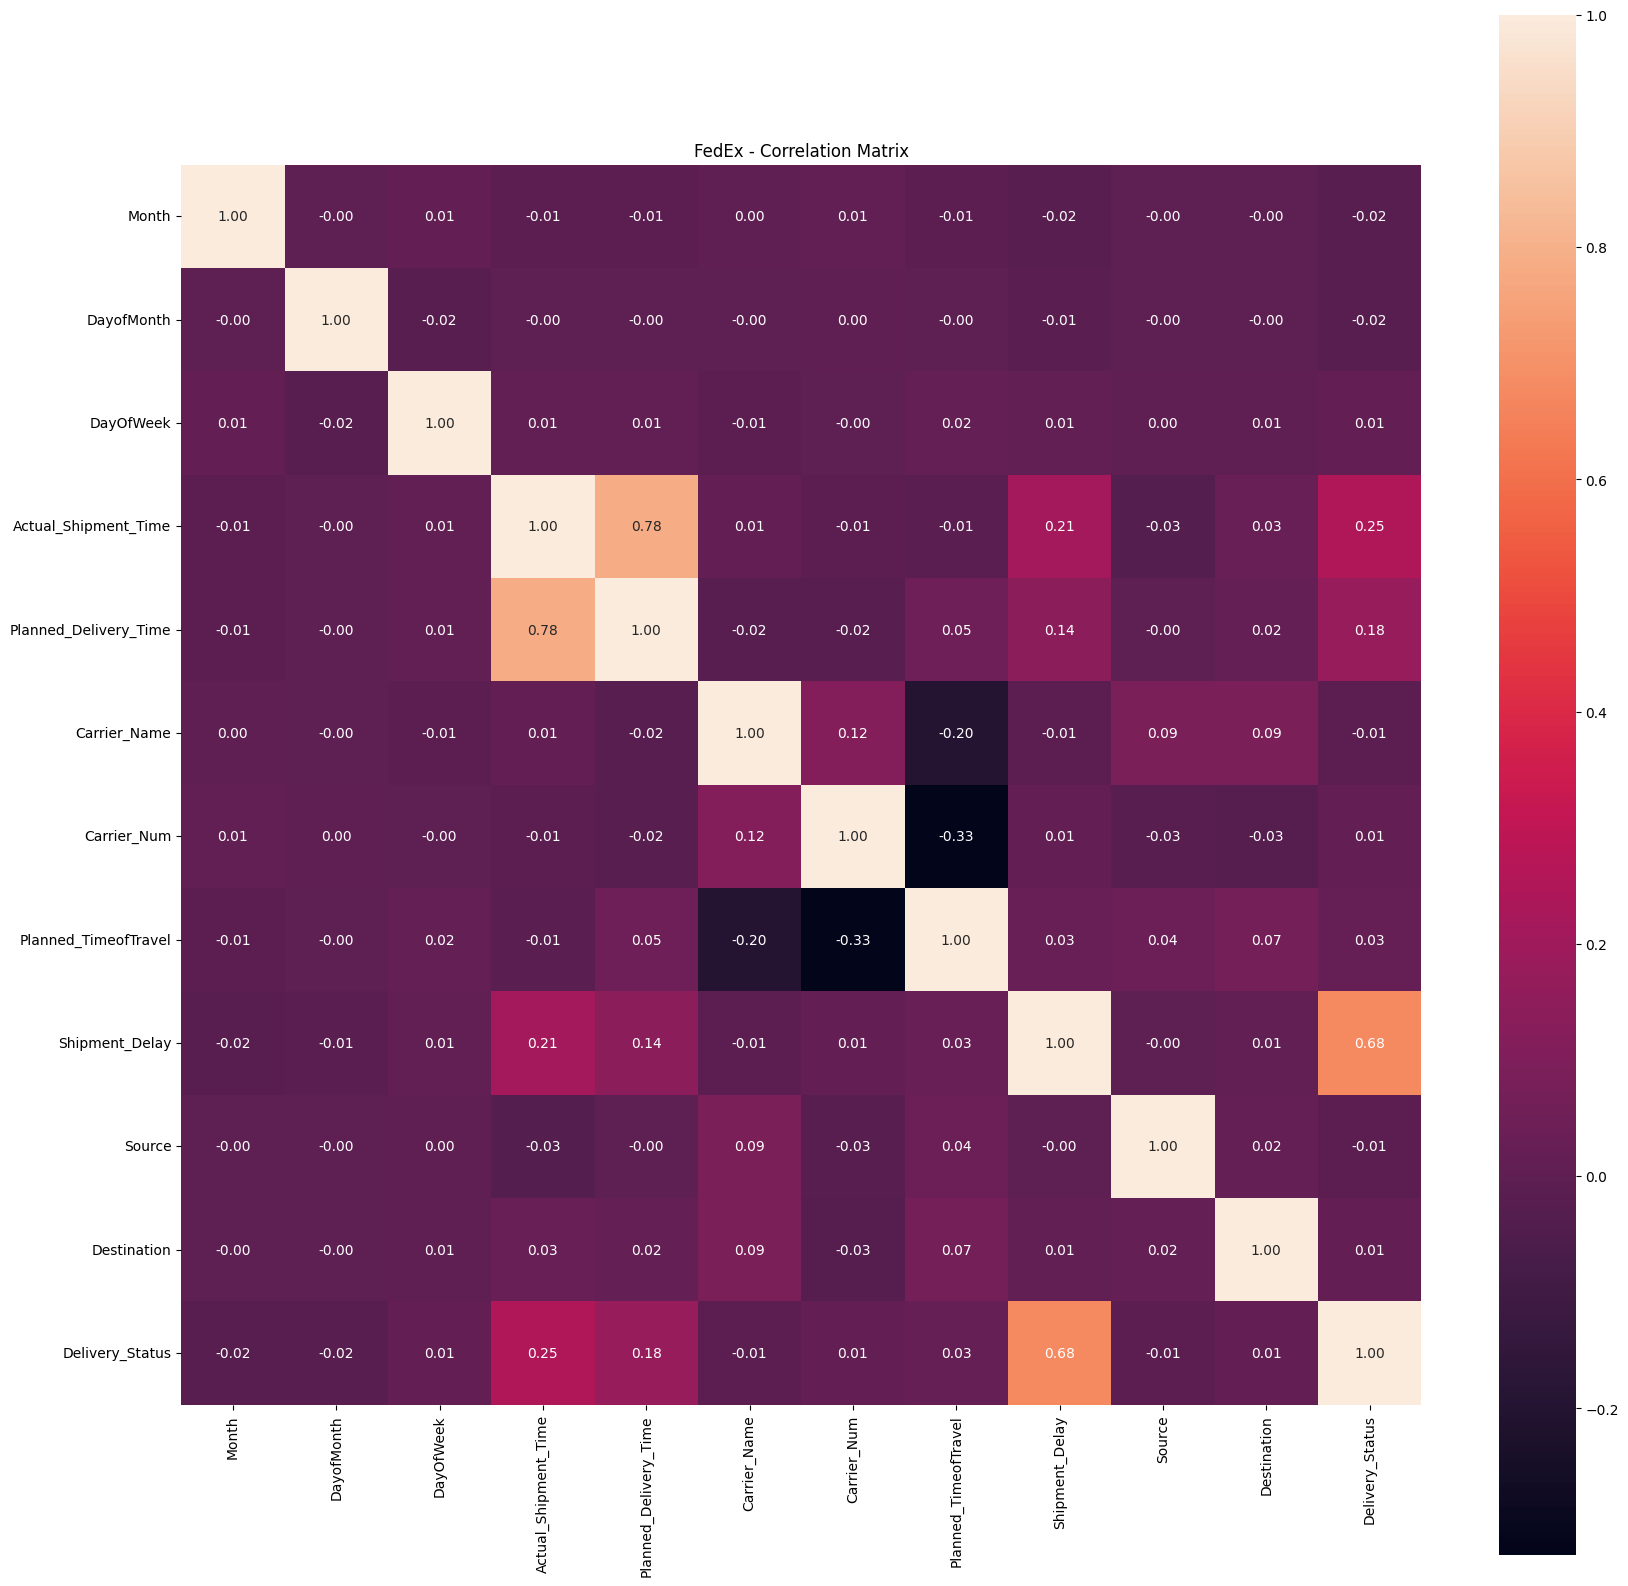

In [95]:
plt.figure(figsize = (20,20))
corr_mtrx = data.corr()
sns.heatmap(corr_mtrx, annot=True, square=True, fmt = '.2f' )
plt.title('FedEx - Correlation Matrix')
plt.show()

In [96]:
#Split Target column
# Assume 'target' is the column you want to predict
X = data.drop(['Delivery_Status'], axis=1)  
y = data['Delivery_Status']  


In [97]:
X.shape, y.shape

((3522163, 11), (3522163,))

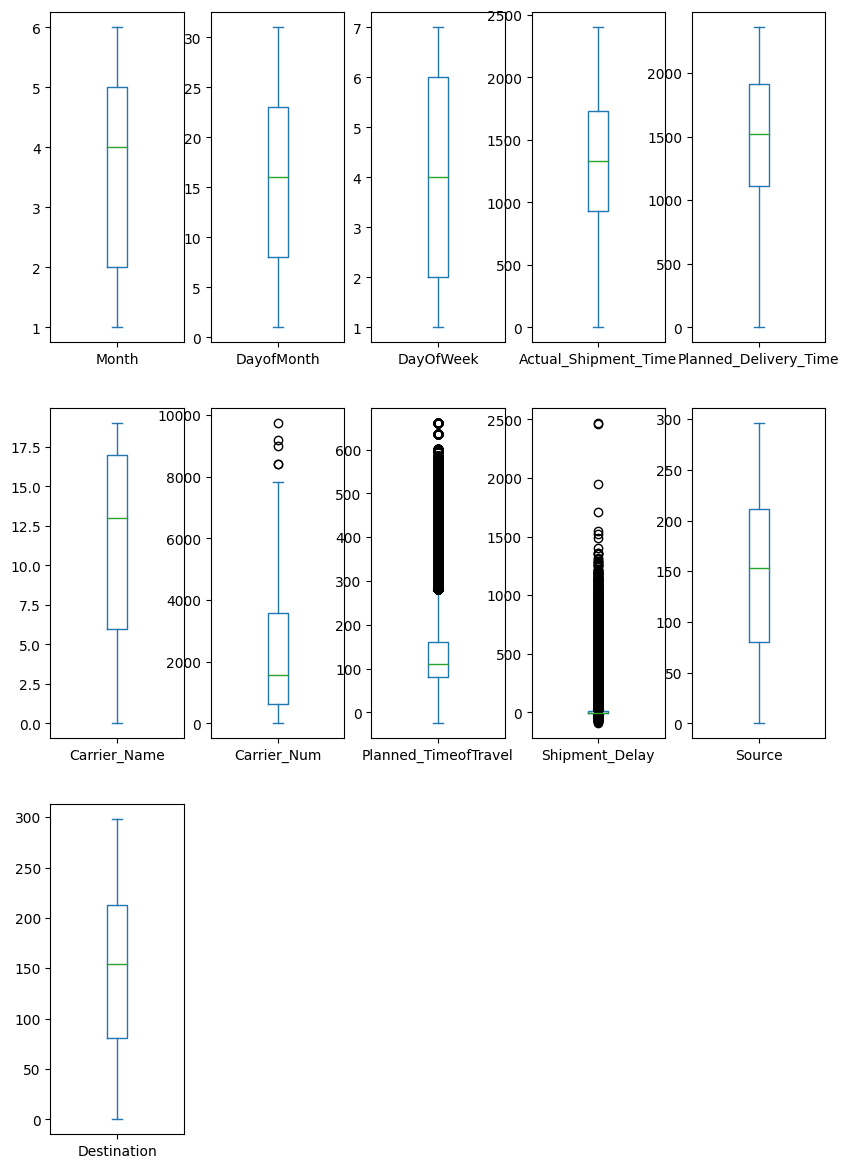

In [98]:
_ = X.plot(kind='box', subplots=True, layout=(6,5), sharex=False, figsize=(10, 30))

In [99]:
# Remove outliers (using IQR method)
def remove_outliers(df,col):
    Q1=df[col].quantile(0.25) 
    Q3=df[col].quantile(0.75) 
    IQR=Q3-Q1
    lower_End = Q1 - 1.5*IQR 
    upper_End = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], lower_End, upper_End)                                                            
    return df

def remove_outliers_all(df, col_list):
    for c in col_list:
        df = remove_outliers(df,c)
    return df

In [100]:
numerical_col = X.select_dtypes(include=np.number).columns.tolist()
X = remove_outliers_all(X,numerical_col)

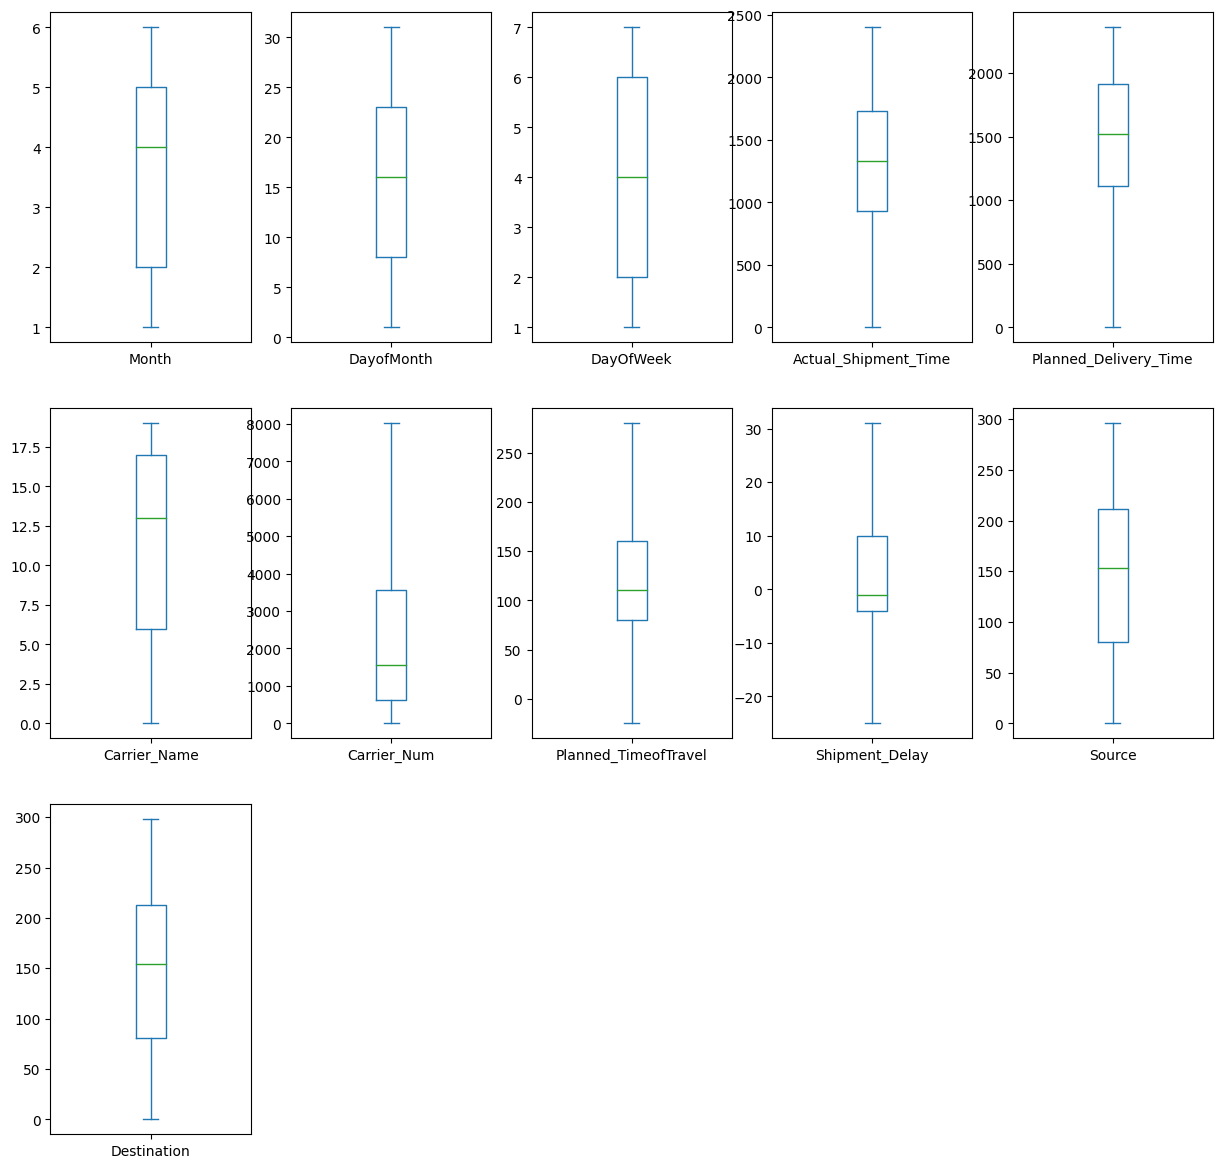

In [101]:
_ = X.plot(kind='box', subplots=True, layout=(6,5), sharex=False, figsize=(15, 30))


KeyboardInterrupt



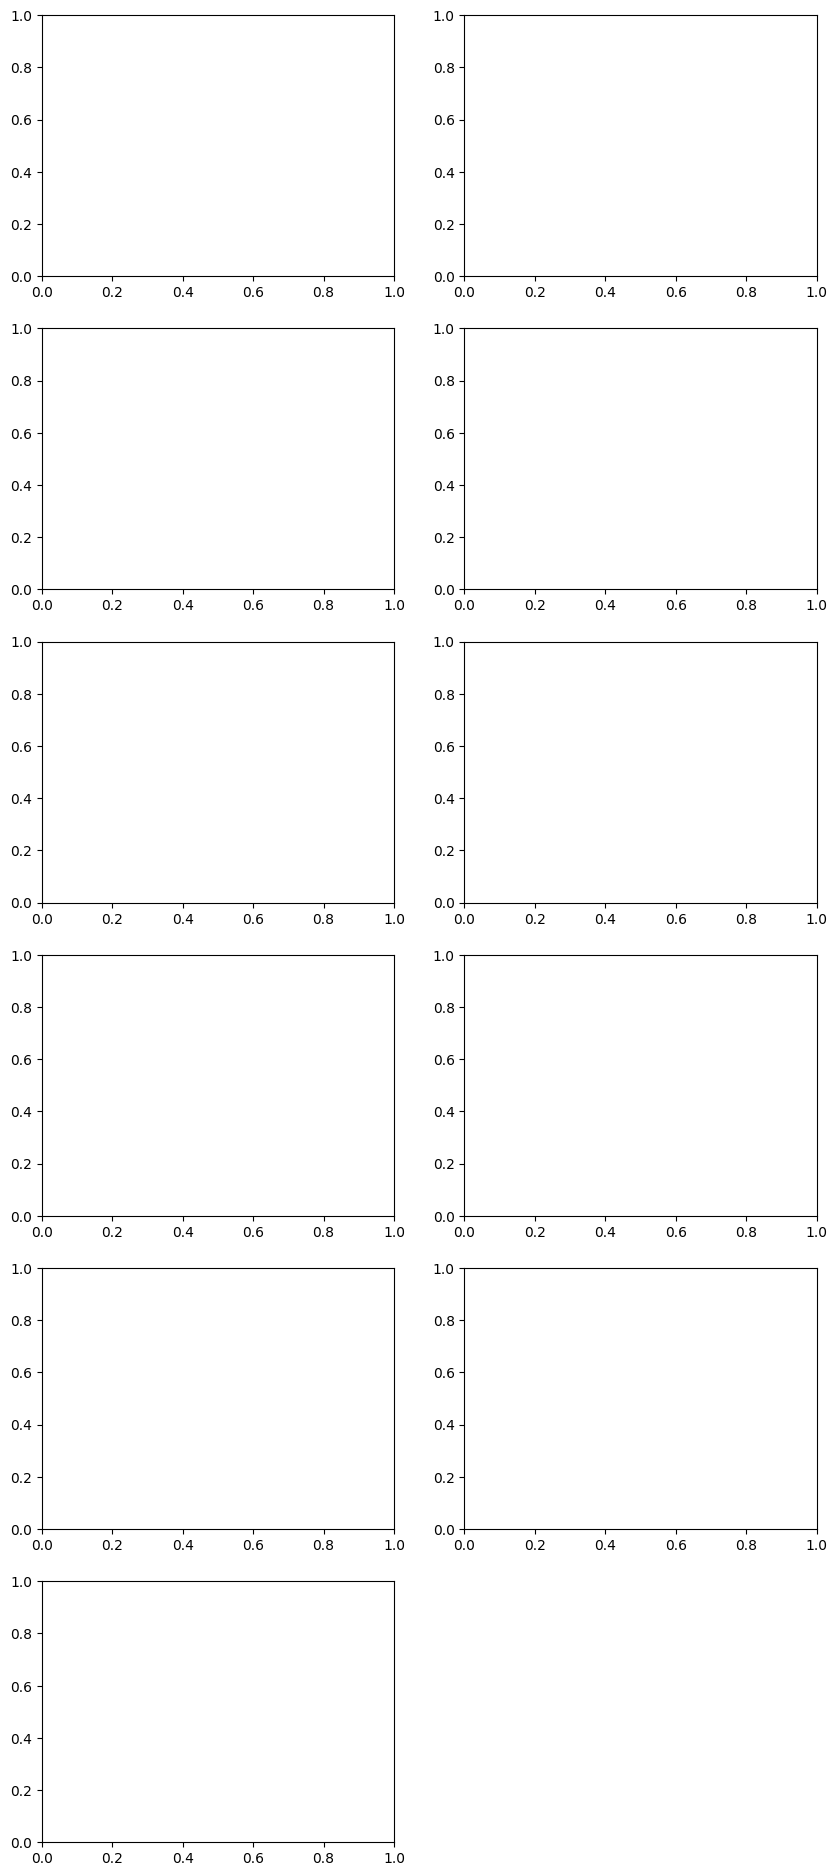

In [102]:
_ = X[numerical_col].plot(kind='density', subplots=True, layout=(10, 2), sharex=False, figsize=(10, 40))

# Check for Skewness in the data

In [103]:
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
skewness = data[numerical_features].skew().sort_values(ascending=False)

print("Skewness of Numerical Features:")
print(skewness)

Skewness of Numerical Features:
Shipment_Delay           6.257128
Planned_TimeofTravel     1.493550
Delivery_Status          1.470028
Carrier_Num              0.906269
DayOfWeek                0.045562
Actual_Shipment_Time     0.043858
DayofMonth               0.000623
Month                   -0.028982
Planned_Delivery_Time   -0.204917
dtype: float64


In [104]:
for feature in skewness[skewness > 1].index:
    if (data[feature] > 0).all():  # Apply only if all values are positive
        data[feature] = np.log1p(data[feature])

In [105]:
for feature in skewness[(skewness > 0.5) & (skewness <= 1)].index:
    data[feature] = np.sqrt(data[feature])

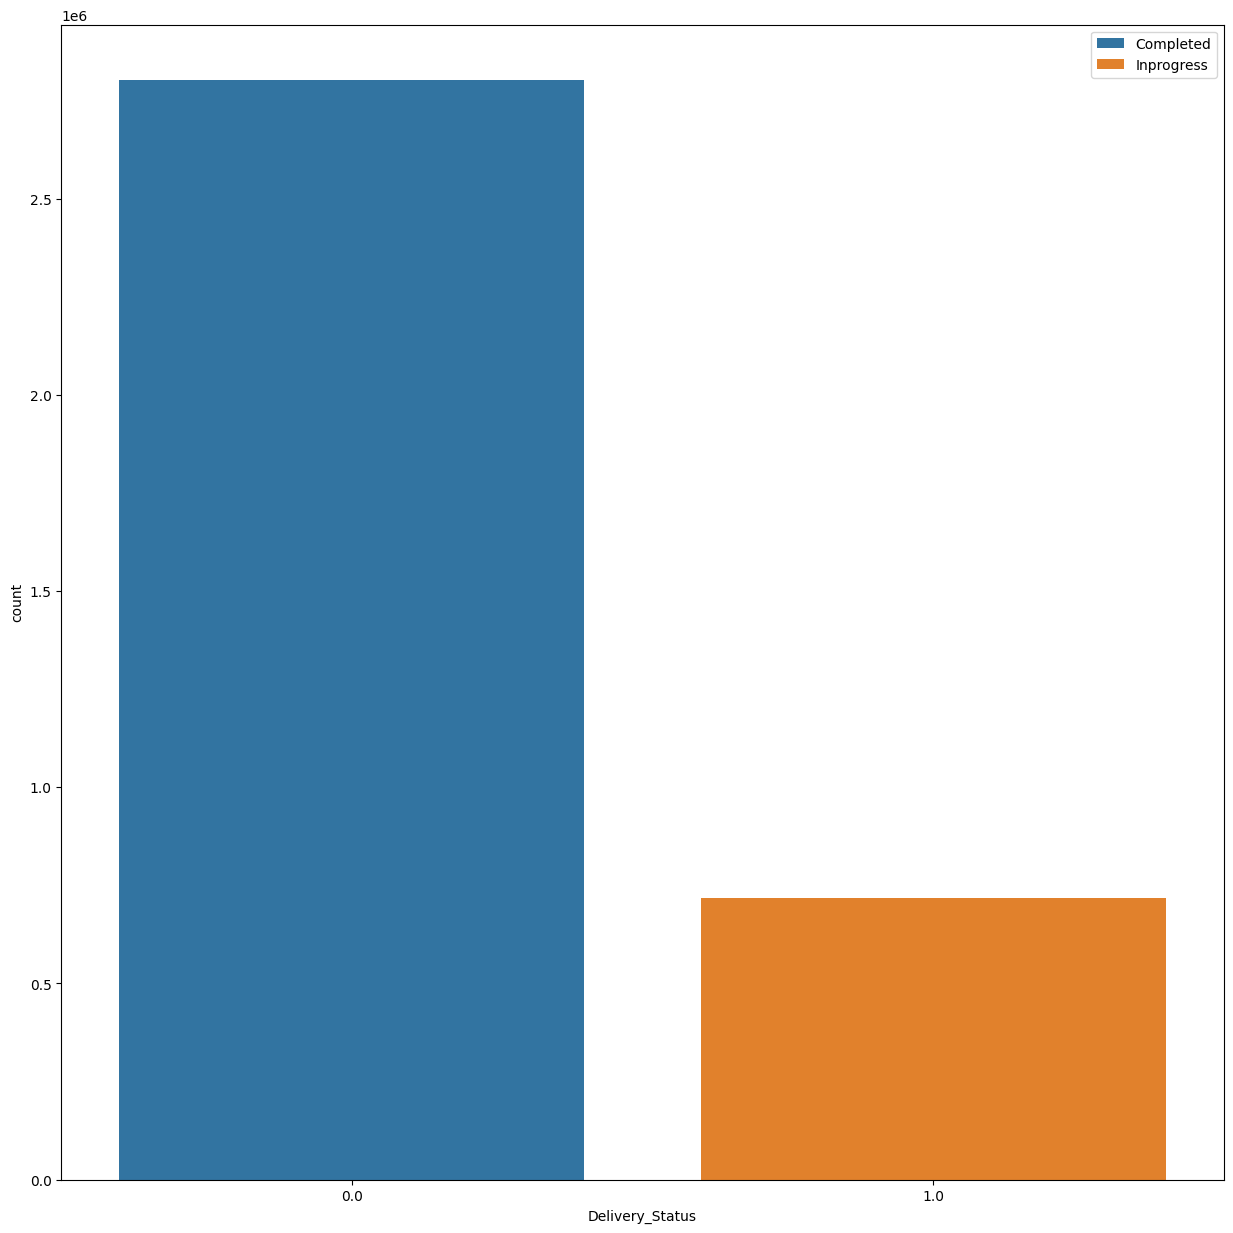

In [106]:
sns.countplot(data=data, x='Delivery_Status', hue='Delivery_Status')
plt.legend(labels=['Completed','Inprogress'])

In [107]:
#resolve imbalance using SMOTE
smt = SMOTE()
X_res, y_res = smt.fit_resample(X[X.select_dtypes(include=np.number).columns.tolist()],y)

In [108]:
X_res.shape, y_res.shape

((5608142, 11), (5608142,))

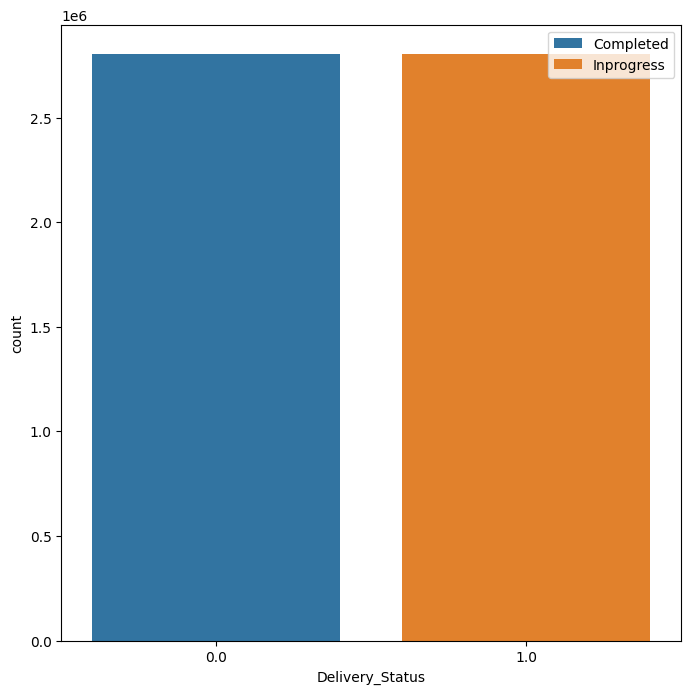

In [110]:
temp = pd.concat([X_res, y_res], axis=1)
plt.figure(figsize=(8, 8))
sns.countplot(data=temp, x='Delivery_Status', hue='Delivery_Status')
plt.legend(labels=['Completed', 'Inprogress'], loc='upper right')

#  Split dataset to train and test

In [118]:
sc = StandardScaler()
normalized_features = sc.fit_transform(X_res)
X_train, X_test, y_train, y_test = train_test_split(normalized_features, y_res, test_size=0.3, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [136]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2465514, 11), (1056649, 11), (2465514,), (1056649,))

In [137]:
#sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Machine learning Models
Artificial Neural Networks

In [140]:
ann_model = Sequential()
ann_model.add(Dense(10, activation='relu'))
ann_model.add(Dense(5, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
ann_model.fit(X_train, y_train , epochs=26, batch_size=50000, verbose=1, use_multiprocessing=True)

Epoch 1/26
50/50 [==============================] - 2s 17ms/step - loss: 0.6482 - accuracy: 0.6961
Epoch 2/26
50/50 [==============================] - 1s 17ms/step - loss: 0.5401 - accuracy: 0.7932
Epoch 3/26
50/50 [==============================] - 1s 16ms/step - loss: 0.4194 - accuracy: 0.8173
Epoch 4/26
50/50 [==============================] - 1s 16ms/step - loss: 0.2997 - accuracy: 0.8661
Epoch 5/26
50/50 [==============================] - 1s 16ms/step - loss: 0.2058 - accuracy: 0.9393
Epoch 6/26
50/50 [==============================] - 1s 16ms/step - loss: 0.1401 - accuracy: 0.9726
Epoch 7/26
50/50 [==============================] - 1s 16ms/step - loss: 0.1010 - accuracy: 0.9793
Epoch 8/26
50/50 [==============================] - 1s 16ms/step - loss: 0.0783 - accuracy: 0.9816
Epoch 9/26
50/50 [==============================] - 1s 16ms/step - loss: 0.0639 - accuracy: 0.9833
Epoch 10/26
50/50 [==============================] - 1s 15ms/step - loss: 0.0540 - accuracy: 0.9849
Epoch 11/

<Axes: xlabel='Epochs'>

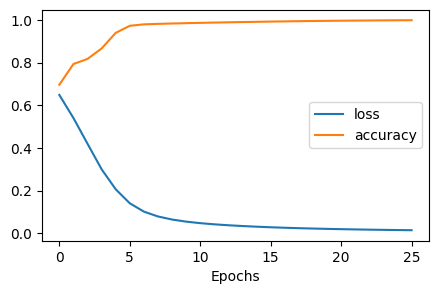

In [141]:
loss_acc = pd.DataFrame(ann_model.history.history)
loss_acc[['loss', 'accuracy']].plot(figsize=(5,3), xlabel='Epochs')

In [142]:
#now testing for Test data
y_pred = ann_model.predict(X_test)
#converting values
y_pred = (y_pred>0.5)

33021/33021 [==============================] - 55s 2ms/step


In [143]:
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
print("confusion Matrix:", cm)
print('score is:',score)

confusion Matrix: [[840870    219]
 [  1062 214498]]
score is: 0.9987876768917587


In [144]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    841089
         1.0       1.00      1.00      1.00    215560

    accuracy                           1.00   1056649
   macro avg       1.00      1.00      1.00   1056649
weighted avg       1.00      1.00      1.00   1056649



Text(0.5, 135.7222222222222, 'Predicted label')

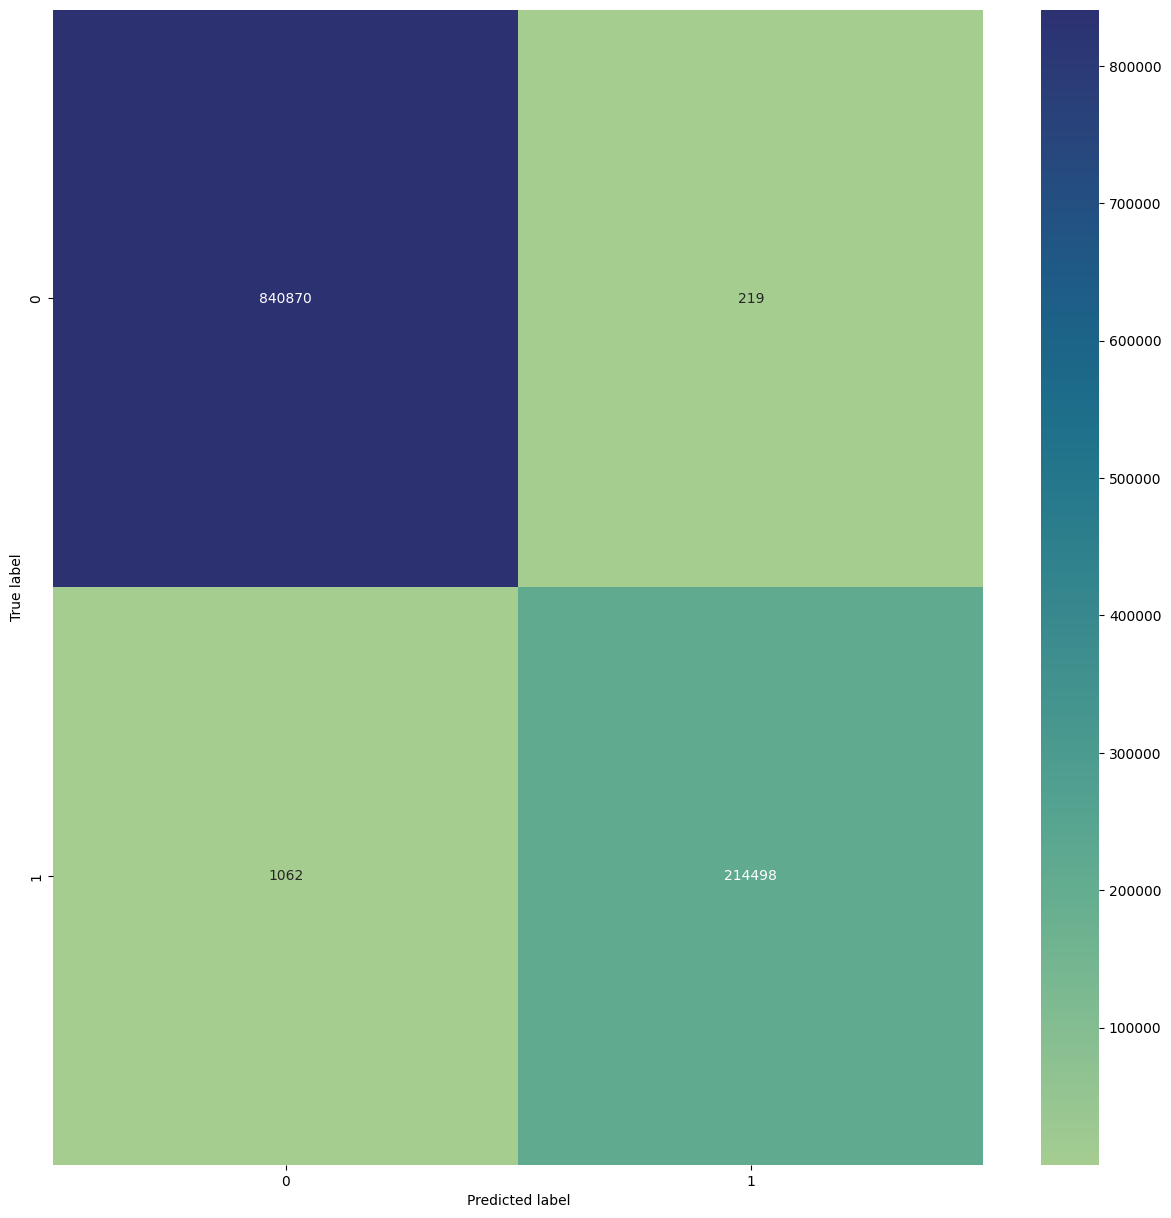

In [145]:
#plot confusion matrix
cm=confusion_matrix( y_test, np.round(y_pred), labels=[0, 1])
df_cm = pd.DataFrame(cm)
sns.heatmap(df_cm, cmap='crest', fmt='',annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [146]:
ann_accuracy = accuracy_score(y_test, np.round(y_pred))
ann_recall = recall_score(y_test, np.round(y_pred))
ann_precision = precision_score(y_test, np.round(y_pred))
ann_f1 = f1_score(y_test, np.round(y_pred))
print("Accuracy:",ann_accuracy,"\n Recall:",ann_recall,"\n Precision:", ann_precision,"f1:",ann_f1)

Accuracy: 0.9987876768917587 
 Recall: 0.9950732974577844 
 Precision: 0.9989800528137036 f1: 0.9970228480722884
